In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [257]:
df_sentiment = pd.read_csv('near_sentiment.csv')
prices = pd.read_csv(r"C:\Users\Ihtisham Ahmad\Desktop\ipython\Social Media\near_price.csv")

In [258]:
df_sentiment = df_sentiment.sort_values('Datetime').reset_index(drop=True)
prices ['change in %'] = ((prices['Close'] - prices['Open'])/prices['Open'])*100
df_sentiment['Date'] = df_sentiment['Datetime'].str[:10].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [259]:
# overall sentiment
df_neg = df_sentiment[df_sentiment['Sentiment'] == 2]
df_pos = df_sentiment[df_sentiment['Sentiment'] == 1]
df_ntrl = df_sentiment[df_sentiment['Sentiment']==0]
df_irr = df_sentiment[df_sentiment['Sentiment']==3]
print(len(df_neg))
print(len(df_pos))
print(len(df_ntrl))
print(len(df_irr))

2913
17061
13495
16387


<ipython-input-245-efa52a8ed753>:9: RuntimeWarning: divide by zero encountered in log
  sent_sum_neg = np.log(sent_sum_neg)


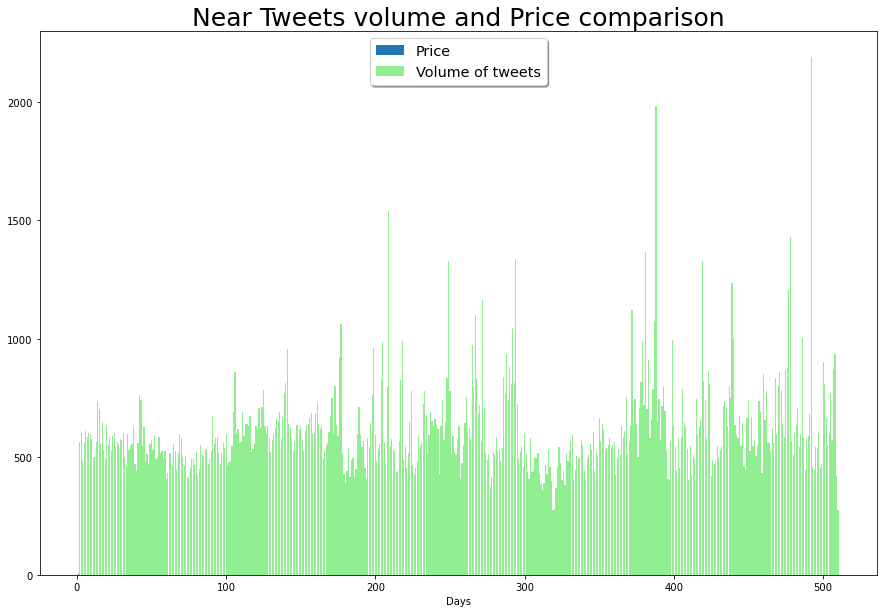

In [245]:
def one_day_analysis(df_sent, df_price):
    sent_sum_neg = []
    sent_sum_pos = []
    for date in  df_price['Date']:
        #sent_sum_neg.append(df_neg[df_neg['Date'] == date].Sentiment.sum())
        #sent_sum_pos.append(df_pos[df_pos['Date'] == date].Sentiment.sum())
        sent_sum_neg.append(df_neg[df_neg['Date'] == date].Sentiment.count())
        sent_sum_pos.append(df_pos[df_pos['Date'] == date].Sentiment.count())
    sent_sum_neg = np.log(sent_sum_neg)
    #sent_sum_neg = -1 * np.array(sent_sum_neg)

    #sent_sum_neg = np.log(sent_sum_neg)
    #sent_sum_neg = -1 * sent_sum_neg

    plt.figure(figsize=(15, 10))    
   # plt.bar(range(1, df_price.shape[0]+1), sent_sum_neg/np.linalg.norm(sent_sum_pos), color = 'red', label = 'Negative sentiment')
   # plt.bar(range(1, df_price.shape[0]+1), sent_sum_pos/np.linalg.norm(sent_sum_pos), color = 'green', label = 'Positive Sentiment')
    plt.bar(range(1, df_price.shape[0]+1), (prices ['Open']/3), label = "Price")    
    #plt.bar(range(1, df_price.shape[0]+1), np.log(sent_sum_pos), color = 'lightgreen', label = 'Positive Sentiment')
    #plt.bar(range(1, df_price.shape[0]+1), sent_sum_neg, color = 'lightcoral', label = 'Negative sentiment')
    plt.bar(range(1, df_price.shape[0]+1), tweets_volume, color = 'lightgreen', label = 'Volume of tweets')
    plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.title('Near Tweets volume and Price comparison', fontsize= 25)
    plt.xlabel('Days')
    plt.savefig('.png')
    
one_day_analysis(df_sentiment, prices)  

In [246]:
df = df_sentiment.copy()
df['Sentiment'] = df['Sentiment'].replace(2,-1)
df['Sentiment'] = df['Sentiment'].replace(3,0)

In [247]:
tweets_volume = []
for date in prices['Date']:
        tweets_volume.append(df[df['Date'] == date].Sentiment.count())
        

In [248]:
data1 = []
data2 = []
for date in  prices['Date']:
    data1.append(df[df['Date'] == date].Sentiment.sum())
    #data1.append(df[df['Date'] == date].Sentiment.count())
    data2.append(float(prices[prices['Date'] == date]['Open']))

In [249]:

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.588, p=0.000
Probably dependent


In [250]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau

stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.402, p=0.000
Probably dependent


In [163]:
data1

[0,
 564,
 600,
 480,
 556,
 607,
 583,
 598,
 591,
 576,
 499,
 497,
 561,
 736,
 700,
 554,
 648,
 530,
 492,
 636,
 550,
 582,
 523,
 588,
 601,
 541,
 563,
 548,
 573,
 569,
 599,
 500,
 460,
 596,
 529,
 543,
 555,
 627,
 471,
 439,
 558,
 763,
 740,
 545,
 626,
 478,
 510,
 468,
 554,
 571,
 530,
 590,
 488,
 499,
 584,
 514,
 525,
 492,
 526,
 404,
 432,
 517,
 517,
 461,
 552,
 525,
 442,
 516,
 596,
 578,
 498,
 462,
 504,
 409,
 415,
 452,
 490,
 492,
 465,
 521,
 424,
 448,
 549,
 506,
 501,
 530,
 531,
 470,
 491,
 525,
 674,
 554,
 581,
 585,
 521,
 470,
 517,
 559,
 536,
 595,
 465,
 476,
 483,
 544,
 691,
 857,
 599,
 619,
 556,
 564,
 687,
 586,
 639,
 638,
 630,
 673,
 518,
 531,
 552,
 629,
 615,
 704,
 621,
 709,
 782,
 631,
 602,
 631,
 581,
 518,
 570,
 597,
 622,
 664,
 653,
 688,
 576,
 669,
 771,
 813,
 955,
 639,
 620,
 577,
 524,
 565,
 636,
 632,
 619,
 631,
 571,
 524,
 610,
 632,
 637,
 663,
 683,
 597,
 600,
 683,
 729,
 640,
 615,
 629,
 490,
 522,
 548,


<ipython-input-272-f1f9df6079b3>:22: RuntimeWarning: divide by zero encountered in log
  weekly_neg = np.log(weekly_neg)
<ipython-input-272-f1f9df6079b3>:29: RuntimeWarning: divide by zero encountered in log
  plt.bar(range(1, len(price_change)+1), np.log(weekly_pos), color = 'lightgreen', label = 'Positive Sentiment')


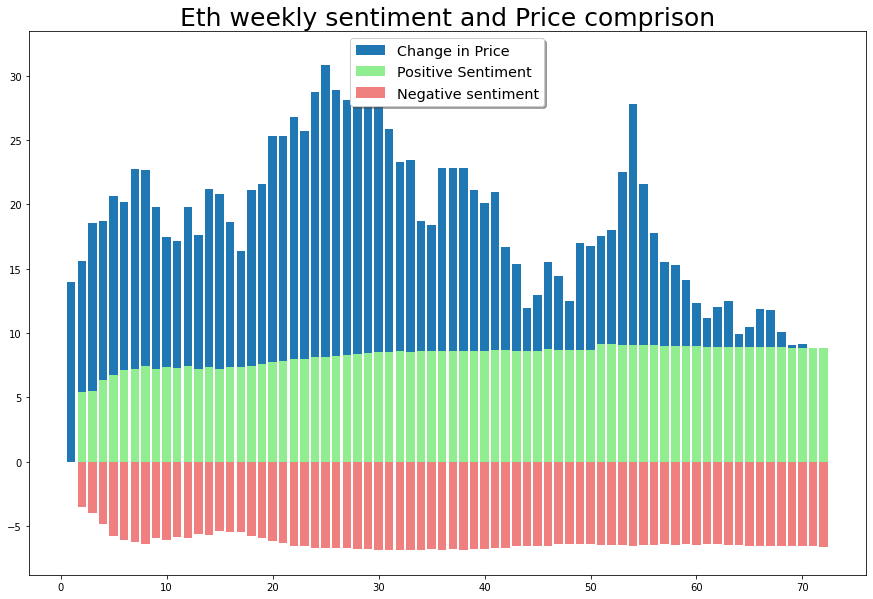

In [272]:
def weekly_analysis(df_sent, df_price):
    sent_sum_neg = []
    sent_sum_pos = []
    weekly_neg = []
    weekly_pos = []
    price_change = []
    j = 0
    for date in  df_price['Date']:
        #sent_sum_neg.append(df_neg[df_neg['Date'] == date].sentiment.sum())
        #sent_sum_pos.append(df_pos[df_pos['Date'] == date].sentiment.sum())
        sent_sum_neg.append(df_neg[df_neg['Date'] == date].Sentiment.count())
        sent_sum_pos.append(df_pos[df_pos['Date'] == date].Sentiment.count())
    #sent_sum_neg = np.log(sent_sum_neg)
    price = []
    for i in range(7,df_price.shape[0],7):
        j = i-j
        weekly_neg.append(np.sum(sent_sum_neg[j:i]))
        weekly_pos.append(np.sum(sent_sum_pos[j:i]))
        price_change.append(((df_price['Close'][i] - df_price['Open'][j])/df_price['Open'][j]))
        price.append(df_price['Open'][i])
    #weekly_neg = -1 * np.array(weekly_neg)
    weekly_neg = np.log(weekly_neg)
    weekly_neg = -1 * np.array(weekly_neg)
    plt.figure(figsize=(15, 10))    
   # plt.bar(range(1, df_price.shape[0]+1), sent_sum_neg/np.linalg.norm(sent_sum_pos), color = 'red', label = 'Negative sentiment')
   # plt.bar(range(1, df_price.shape[0]+1), sent_sum_pos/np.linalg.norm(sent_sum_pos), color = 'green', label = 'Positive Sentiment')
    plt.bar(range(1, len(price_change)+1), np.array(price)/150, label = "Change in Price")
    
    plt.bar(range(1, len(price_change)+1), np.log(weekly_pos), color = 'lightgreen', label = 'Positive Sentiment')
    plt.bar(range(1, len(price_change)+1), weekly_neg, color = 'lightcoral', label = 'Negative sentiment')
    #plt.bar(range(1, len(price_change)+1), np.array(price_change)*15, label = "Change in Price")
    plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.title('Eth weekly sentiment and Price comprison', fontsize= 25)
    plt.savefig('near_weekly.png')
weekly_analysis(df_sentiment, prices)    

In [32]:
df_sentiment[500:550][['Text','Sentiment']]

,Text,Sentiment
500,incoming bitcoingem ethereum btc xrpthestandar...,1
501,ethereum eth bitcoin btc,0
502,is for sale blockchain domainsforsale btcusd a...,3
503,cme etf for ethereum th feb will push to new ath,0
504,ethereum so bullish,0
505,wedge is actually doing thing eth ethereum btc...,1
506,honesty first ethereum defi,3
507,binance the stacking page no longer shows how ...,3
508,broke resistance on the hour candle ethereum b...,1
509,we ll probably see testing the zone really soo...,0


In [40]:
df_sentiment.iloc[507]['Text']

'binance the stacking page no longer shows how much ethereum we stacked but only how much we have not very practical because we earn interest on stacked amount not on total amount thanks'

In [41]:
prices

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,change in %
0,0,2022-05-25,1978.677042,2014.369526,1943.938546,1944.827845,1.336455e+10,2.351741e+11,-0.427675
1,1,2022-05-24,1972.390871,1991.535499,1920.688158,1978.982754,1.305711e+10,2.392786e+11,0.083552
2,2,2022-05-23,2042.344786,2080.333377,1964.386581,1972.181889,1.643453e+10,2.384310e+11,-0.858852
3,3,2022-05-22,1974.670604,2047.191436,1966.038780,2043.170126,1.094112e+10,2.469868e+11,0.867227
4,4,2022-05-21,1961.017996,1985.395961,1944.265107,1974.518367,8.546822e+09,2.386625e+11,0.172109
...,...,...,...,...,...,...,...,...,...
505,505,2021-01-05,1041.498831,1129.371488,986.811283,1100.006099,4.153593e+10,1.255456e+11,1.404401
506,506,2021-01-04,977.058819,1153.189232,912.305338,1040.233048,5.694599e+10,1.187095e+11,1.616439
507,507,2021-01-03,774.511865,1006.565002,771.561645,975.507673,4.520046e+10,1.113100e+11,6.487822
508,508,2021-01-02,730.402673,786.798458,718.109517,774.534968,1.974077e+10,8.836761e+10,1.510547


In [43]:
raw = pd.read_csv(r"C:\Users\Ihtisham Ahmad\Desktop\ipython\Social Media\Ethereum.csv")

In [44]:
raw

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-05-24 23:59:23+00:00,1529250742317596672,"The $ETH price is at $1,979.03 right now.\n🟢 C...",Ethereum8News
1,1,2022-05-24 23:44:23+00:00,1529246965363617794,"The $ETH price is at $1,977.47 right now.\n🔴 C...",Ethereum8News
2,2,2022-05-24 23:33:28+00:00,1529244220502024193,Sold! CryptoPunk #3042 was purchased for Ξ45.5...,nft_tracker
3,3,2022-05-24 23:31:46+00:00,1529243790602649602,WAKE ME UP WHEN THE NEXT BULL RUN STARTS #cryp...,CJ_CosmicCrypto
4,4,2022-05-24 23:30:18+00:00,1529243421944201216,Best tip to survive the crypto bear market? Ta...,VeChainFam
...,...,...,...,...,...
310640,310640,2021-01-01 00:07:27+00:00,1344797348761899014,$sxp Tp2 ✅ %20 kar ile ikinci hedefim de geldi...,CorleoneCT
310641,310641,2021-01-01 00:05:33+00:00,1344796869579464705,$ETH has out preformed $BTC by 53% in 2020.\n#...,Abdull17069552
310642,310642,2021-01-01 00:03:13+00:00,1344796283785990144,$ETH\n\n#Ethereum today will give us an idea i...,timepricetravel
310643,310643,2021-01-01 00:02:06+00:00,1344796002348371973,$ETH Ranges for the next session: \nUpper: $74...,themarketradar


In [52]:
raw['Text'][5050:5100]

5050    Ethereum ETH Current Price:\n$2,078.24\n\n1h: ...
5051    The $ETH price is at $2,080 right now.\n🟢 Comp...
5052    @tradingview and if we get this. $eth #Ethereu...
5053    📉 #Ethereum $ETH Number of Addresses in Profit...
5054    🚨 Weekly On-Chain Exchange Flow 🚨\n\n#Bitcoin ...
5055    The $ETH price is at $2,070.05 right now.\n🔴 C...
5056    The ETH/BTC market cap ratio is currently 43.3...
5057    Precio actual del #Bitcoin, #Ethereum y #Rippl...
5058    📊 Daily On-Chain Exchange Flow\n\n#Bitcoin $BT...
5059    The $ETH price is at $2,077.25 right now.\n🟢 C...
5060    🍃 Slow High on Friday 🍃\n\nThis Project Highla...
5061    $BTC $ETH Weekly. \n#BTC seems to be still stu...
5062    The $ETH price is at $2,074.11 right now.\n🔴 C...
5063    Ethereum zones for the week.\nWill price gain ...
5064    Tras la caída del #criptomercado, hay todo tip...
5065    Precio actual del #Bitcoin, #Ethereum y #Rippl...
5066    Ethereum ETH Current Price:\n$2,069.41\n\n1h: ...
5067    The $E

In [54]:
raw['Text'][5053]

'📉 #Ethereum $ETH Number of Addresses in Profit (7d MA) just reached a 16-month low of 48,313,450.268\n\nView metric:\nhttps://t.co/9t2b8JZ83s https://t.co/pmSwT2a4TM'

In [70]:
preprocess2(raw['Text'][5053])

NameError: name 'RegexpTokenizer' is not defined

In [64]:
def preprocess(message):
    """
    This function takes a string as input, then performs these operations: 
        - lowercase
        - remove URLs
        - remove ticker symbols 
        - removes punctuation
        - removes any single character tokens
    Parameters
    ----------
        message : The text message to be preprocessed
    Returns
    -------
        text: The preprocessed text
    """ 
    # Lowercase the twit message
    text = message.lower()
    print(text)
    # Replace URLs with a space in the message
    text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
    print(text)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
    print(text)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    text = re.sub('\@[a-zA-Z0-9]*', ' ', text)
    print(text)
    # Replace everything not a letter or apostrophe with a space
    text = re.sub('[^a-zA-Z\']', ' ', text)
    print(text)
    # Remove single letter words
    text = ' '.join( [w for w in text.split() if len(w)>1] )
    print(text)
    
    return text

In [61]:
import re

In [82]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
global counter
counter = 0
def preprocess2(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

  #clean as much as possible, but not apply strong editing to the text, yet
  sentence=str(sentence)
  tokenizer = RegexpTokenizer(r'\w+')
  print(sentence)
  sentence = sentence.lower()
  print(sentence)
  sentence=sentence.replace('{html}',"") 
  print(sentence)
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  print(cleantext)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokens = tokenizer.tokenize(rem_num)
  print(tokens)
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  print(filtered_words)
  if stemming == True and lemmatizing == False:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)

  if stemming == False and lemmatizing == True:
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

  if stemming == True and lemmatizing == True:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
 
  #at the end of the algo we return filtered words
  return " ".join(filtered_words)

[nltk_data] Downloading package wordnet to C:\Users\Ihtisham
[nltk_data]     Ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ihtisham
[nltk_data]     Ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
preprocess2(raw['Text'][5053], True, True)

📉 #Ethereum $ETH Number of Addresses in Profit (7d MA) just reached a 16-month low of 48,313,450.268

View metric:
https://t.co/9t2b8JZ83s https://t.co/pmSwT2a4TM
📉 #ethereum $eth number of addresses in profit (7d ma) just reached a 16-month low of 48,313,450.268

view metric:
https://t.co/9t2b8jz83s https://t.co/pmswt2a4tm
📉 #ethereum $eth number of addresses in profit (7d ma) just reached a 16-month low of 48,313,450.268

view metric:
https://t.co/9t2b8jz83s https://t.co/pmswt2a4tm
📉 #ethereum $eth number of addresses in profit (7d ma) just reached a 16-month low of 48,313,450.268

view metric:
https://t.co/9t2b8jz83s https://t.co/pmswt2a4tm
['ethereum', 'eth', 'number', 'of', 'addresses', 'in', 'profit', 'd', 'ma', 'just', 'reached', 'a', 'month', 'low', 'of', 'view', 'metric']
['ethereum', 'eth', 'number', 'addresses', 'profit', 'reached', 'month', 'low', 'view', 'metric']


'ethereum eth number address profit reach month low view metric'

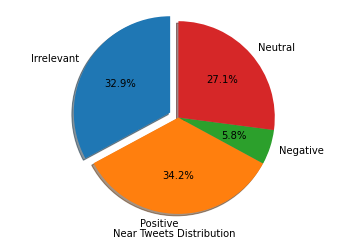

In [190]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Irrelevant', 'Positive', 'Negative', 'Neutral'
sizes = [16387, 17061, 2913, 13495]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.xlabel('Near Tweets Distribution')

plt.show()

In [260]:
prices['Sentiments'] = data1

In [261]:
prices['Tweets Volume'] = tweets_volume

In [262]:
prices  = prices.drop(columns = ['Market Cap', 'Unnamed: 0'])

In [264]:
prices.to_csv('price_pred_near_train.csv')

In [265]:
prices = pd.read_csv('price_pred_eth_train.csv')

In [268]:
prices.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1','Date', 'Market Cap' ]).head()

,Open,High,Low,Close,Volume,change in %,Tweets Volume,Sentiments
0,1978.677042,2014.369526,1943.938546,1944.827845,1.336455e+10,-1.710698,0,0
1,1972.390871,1991.535499,1920.688158,1978.982754,1.305711e+10,0.334208,564,-95
2,2042.344786,2080.333377,1964.386581,1972.181889,1.643453e+10,-3.435409,600,75
3,1974.670604,2047.191436,1966.038780,2043.170126,1.094112e+10,3.468909,480,87
4,1961.017996,1985.395961,1944.265107,1974.518367,8.546822e+09,0.688437,556,-20
